# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Ivan Yurdean
- Email: ivanyurdean50@gmail.com
- Id Dicoding: ivan_y

## Persiapan

### Menyiapkan library yang dibutuhkan

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

### Menyiapkan data yang akan digunakan

In [53]:
# Memanggil dataset
df = pd.read_csv('C:/Aplikasi/Dicoding/Proyek akhir/Dataset/data.csv',sep=';')

## Data Understanding

In [54]:
# Menampilkan gambaran umum dari data
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [55]:
# Menampilkan info dari data serta tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [56]:
# Menampilkan lima data teratas
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [57]:
# Mengidentifikasi adanya missing value
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [58]:
# Melihat adanya duplikasi dari data
df.duplicated().sum()

np.int64(0)

In [59]:
# Menampilkan jumlah baris dan kolom
df.shape

(4424, 37)

In [60]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\4031243151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Status',data=df, palette='mako')


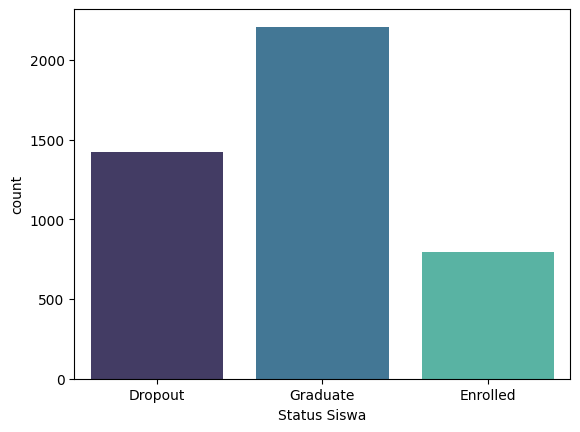

In [61]:
# Grafik dari status
sns.countplot(x = 'Status',data=df, palette='mako')
plt.xlabel('Status Siswa')
plt.show()

In [62]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [63]:
df['mothers_qualification'] = df['Mothers_qualification'].astype(str)

df['mothers_qualification'].replace({'1':'Secondary Education12th Year of Schooling or Eq' ,
                                     '2': 'Higher Education - Bachelors Degree' ,
                                     '3': 'Higher Education - Degree' ,
                                     '4': 'Higher Education - Masters' ,
                                     '5': 'Higher Education - Doctorate' ,
                                     '6': 'Frequency of Higher Education' ,
                                     '9': '12th Year of Schooling - Not Completed' ,
                                     '10': '11th Year of Schooling - Not Completed' ,
                                     '11': '7th Year (Old)' ,
                                     '12': 'Other - 11th Year of Schooling' ,
                                     '14': '10th Year of Schooling' ,
                                     '18': 'General commerce course' ,
                                     '19': 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.' ,
                                     '22': 'Technical-professional course',
                                     '26': '7th year of schooling' ,
                                     '27': '2nd cycle of the general high school course' ,
                                     '29': '9th Year of Schooling - Not Completed' ,
                                     '30': '8th year of schooling' ,
                                     '34': 'Unknown' ,
                                     '35': 'Cant read or write' ,
                                     '36': 'Can read without having a 4th year of schooling' ,
                                     '37': 'Basic education 1st cycle (4th/5th year) or equiv.' ,
                                     '38': 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.' ,
                                     '39': 'Technological specialization course',
                                     '40': 'Higher education - degree (1st cycle)' ,
                                     '41': 'Specialized higher studies course' ,
                                     '42': 'Professional higher technical course', 
                                     '43': 'Higher Education - Master (2nd cycle)' ,
                                     '44': 'Higher Education - Doctorate (3rd cycle)'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\659590304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mothers_qualification'].replace({'1':'Secondary Education12th Year of Schooling or Eq' ,


In [64]:
df['fathers_qualification'] = df['Fathers_qualification'].astype(str)

df['fathers_qualification'].replace({'1': 'Secondary Education - 12th Year of Schooling or Eq.' ,
                                     '2': 'Higher Education - Bachelors Degree' ,
                                     '3': 'Higher Education - Degree' ,
                                     '4': 'Higher Education - Masters' ,
                                     '5': 'Higher Education - Doctorate' ,
                                     '6': 'Frequency of Higher Education' ,
                                     '9': '12th Year of Schooling - Not Completed' ,
                                     '10': '11th Year of Schooling - Not Completed' ,
                                     '11': '7th Year (Old)' ,
                                     '12': 'Other - 11th Year of Schooling' ,
                                     '13': '2nd year complementary high school course' ,
                                     '14': '10th Year of Schooling' ,
                                     '18': 'General commerce course' ,
                                     '19': 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.' ,
                                     '20': 'Complementary High School Course' ,
                                     '22': 'Technical-professional course' ,
                                     '25': 'Complementary High School Course - not concluded' ,
                                     '26': '7th year of schooling' ,
                                     '27': '2nd cycle of the general high school course' ,
                                     '29': '9th Year of Schooling - Not Completed' ,
                                     '30': '8th year of schooling' ,
                                     '31': 'General Course of Administration and Commerce' ,
                                     '33': 'Supplementary Accounting and Administration' ,
                                     '34': 'Unknown' ,
                                     '35': 'Cant read or write' ,
                                     '36': 'Can read without having a 4th year of schooling' ,
                                     '37': 'Basic education 1st cycle (4th/5th year) or equiv.' ,
                                     '38': 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.' ,
                                     '39': 'Technological specialization course' ,
                                     '40': 'Higher education - degree (1st cycle)' ,
                                     '41': 'Specialized higher studies course' ,
                                     '42': 'Professional higher technical course' ,
                                     '43': 'Higher Education - Master (2nd cycle)' ,
                                     '44': 'Higher Education - Doctorate (3rd cycle)'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\2988277126.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fathers_qualification'].replace({'1': 'Secondary Education - 12th Year of Schooling or Eq.' ,


In [65]:
df['mothers_occupation'] = df['Mothers_occupation'].astype(str)

df['mothers_occupation'].replace({'0': 'Student', 
                                  '1': 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 
                                  '2': 'Specialists in Intellectual and Scientific Activities' ,
                                  '3': 'Intermediate Level Technicians and Professions' ,
                                  '4': 'Administrative staff', 
                                  '5': 'Personal Services, Security and Safety Workers and Sellers', 
                                  '6': 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry' ,
                                  '7': 'Skilled Workers in Industry, Construction and Craftsmen' ,
                                  '8': 'Installation and Machine Operators and Assembly Workers' ,
                                  '9': 'Unskilled Workers' ,
                                  '10': 'Armed Forces Professions' ,
                                  '90': 'Other Situation' ,
                                  '99': '(blank)' ,
                                  '122': 'Health professionals' ,
                                  '123': 'teachers' ,
                                  '125': 'Specialists in information and communication technologies (ICT)',
                                  '131': 'Intermediate level science and engineering technicians and professions' ,
                                  '132': 'Technicians and professionals, of intermediate level of health' ,
                                  '134': 'Intermediate level technicians from legal, social, sports, cultural and similar services' ,
                                  '141': 'Office workers, secretaries in general and data processing operators' ,
                                  '143': 'Data, accounting, statistical, financial services and registry-related operators' ,
                                  '144': 'Other administrative support staff' ,
                                  '151': 'personal service workers' ,
                                  '152': 'sellers' ,
                                  '153': 'Personal care workers and the like',
                                  '171': 'Skilled construction workers and the like, except electricians,' ,
                                  '173': 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like' ,
                                  '175': 'Workers in food processing, woodworking, clothing and other industries and crafts' ,
                                  '191':  'cleaning workers' ,
                                  '192': 'Unskilled workers in agriculture, animal production, fisheries and forestry' ,
                                  '193': 'Unskilled workers in extractive industry, construction, manufacturing and transport' ,
                                  '194': 'Meal preparation assistants'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\704059723.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mothers_occupation'].replace({'0': 'Student',


In [66]:
df['fathers_occupation'] = df['Fathers_occupation'].astype(str)

df['fathers_occupation'].replace({'0': 'Student' ,
                                  '1': 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers' ,
                                  '2': 'Specialists in Intellectual and Scientific Activities' ,
                                  '3': 'Intermediate Level Technicians and Professions' ,
                                  '4': 'Administrative staff' ,
                                  '5': 'Personal Services, Security and Safety Workers and Sellers' ,
                                  '6': 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry' ,
                                  '7': 'Skilled Workers in Industry, Construction and Craftsmen' ,
                                  '8': 'Installation and Machine Operators and Assembly Workers' ,
                                  '9': 'Unskilled Workers' ,
                                  '10': 'Armed Forces Professions' ,
                                  '90': 'Other Situation' ,
                                  '99': '(blank)' ,
                                  '101': 'Armed Forces Officers' ,
                                  '102': 'Armed Forces Sergeants' ,
                                  '103': 'Other Armed Forces personnel' ,
                                  '112': 'Directors of administrative and commercial services' ,
                                  '114': 'Hotel, catering, trade and other services directors' ,
                                  '121': 'Specialists in the physical sciences, mathematics, engineering and related techniques' ,
                                  '122': 'Health professionals' ,
                                  '123': 'teachers' ,
                                  '124': 'Specialists in finance, accounting, administrative organization, public and commercial relations' ,
                                  '131': 'Intermediate level science and engineering technicians and professions',
                                  '132': 'Technicians and professionals, of intermediate level of health' ,
                                  '134': 'Intermediate level technicians from legal, social, sports, cultural and similar services' ,
                                  '135': 'Information and communication technology technicians' ,
                                  '141': 'Office workers, secretaries in general and data processing operators' ,
                                  '143': 'Data, accounting, statistical, financial services and registry-related operators' ,
                                  '144': 'Other administrative support staff' ,
                                  '151': 'personal service workers' ,
                                  '152': 'sellers' ,
                                  '153': 'Personal care workers and the like' ,
                                  '154': 'Protection and security services personnel' ,
                                  '161': 'Market-oriented farmers and skilled agricultural and animal production workers' ,
                                  '163': 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence' ,
                                  '171': 'Skilled construction workers and the like, except electricians' ,
                                  '172': 'Skilled workers in metallurgy, metalworking and similar' ,
                                  '174': 'Skilled workers in electricity and electronics' ,
                                  '175': 'Workers in food processing, woodworking, clothing and other industries and crafts' ,
                                  '181': 'Fixed plant and machine operators' ,
                                  '182': 'assembly workers' ,
                                  '183': 'Vehicle drivers and mobile equipment operators' ,
                                  '192': 'Unskilled workers in agriculture, animal production, fisheries and forestry' ,
                                  '193': 'Unskilled workers in extractive industry, construction, manufacturing and transport' ,
                                  '194': 'Meal preparation assistants' ,
                                  '195': 'Street vendors (except food) and street service providers'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\4252163000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fathers_occupation'].replace({'0': 'Student' ,


In [67]:
df['application_mode'] = df['Application_mode'].astype(str)

df['application_mode'].replace({'1': '1st phase - general contingent' ,
                                '2': 'Ordinance No. 612/93' ,
                                '5': '1st phase - special contingent (Azores Island)' ,
                                '7': 'Holders of other higher courses' ,
                                '10': 'Ordinance No. 854-B/99' ,
                                '15': 'International student (bachelor)' ,
                                '16': '1st phase - special contingent (Madeira Island)' ,
                                '17': '2nd phase - general contingent' ,
                                '18': '3rd phase - general contingent' ,
                                '26': 'Ordinance No. 533-A/99, item b2 (Different Plan)' ,
                                '27': 'Ordinance No. 533-A/99, item b3 (Other Institution)' ,
                                '39': 'Over 23 years old' ,
                                '42': 'Transfer' ,
                                '43': 'Change of course' ,
                                '44': 'Technological specialization diploma holders' ,
                                '51': 'Change of institution/course' ,
                                '53': 'Short cycle diploma holders' ,
                                '57': 'Change of institution/course (International)'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\2900913441.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['application_mode'].replace({'1': '1st phase - general contingent' ,


In [68]:
df['previous_qualification'] = df['Previous_qualification']

df['previous_qualification'].replace({'1': 'Secondary education' ,
                                      '2': 'Higher education - bachelors degree' ,
                                      '3': 'Higher education - degree' ,
                                      '4': 'Higher education - masters' ,
                                      '5': 'Higher education - doctorate' ,
                                      '6': 'Frequency of higher education' ,
                                      '9': '12th year of schooling - not completed' ,
                                      '10': '11th year of schooling - not completed' ,
                                      '12': 'Other - 11th year of schooling' ,
                                      '14': '10th year of schooling' ,
                                      '15': '10th year of schooling - not completed' ,
                                      '19': 'Basic education 3rd cycle (9th/10th/11th year) or equiv.' ,
                                      '38': 'Basic education 2nd cycle (6th/7th/8th year) or equiv.' ,
                                      '39': 'Technological specialization course' ,
                                      '40': 'Higher education - degree (1st cycle)' ,
                                      '42': 'Professional higher technical course' ,
                                      '43': 'Higher education - master (2nd cycle)'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\611758666.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_qualification'].replace({'1': 'Secondary education' ,


In [69]:
df['kursus']=df['Course'].astype(str)

In [70]:
df['kursus'].replace({'9500':'Nurising',
                                    '9147':'Management',
                                    '9238':'Social Service',
                                    '9085':'Veterinary Nursing',
                                    '9773':'Journalism and Communication',
                                    '9670':'Advertising and Marketing Manangement',
                                    '9991':'Management (evening attendance)',
                                    '9254':'Tourism',
                                    '9070':'Communication Design',
                                    '171':'Animation and Multimedia Design',
                                    '8014':'Social Service(evening attendance)',
                                    '9003':'Agronomy',
                                    '9853':'Basic Education',
                                    '9119':'Informatics Engineering',
                                    '9130':'Equinculture',
                                    '9556':'Oral Hygiene',
                                    '33':'Biofuel Production Technologies'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\3744347817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kursus'].replace({'9500':'Nurising',


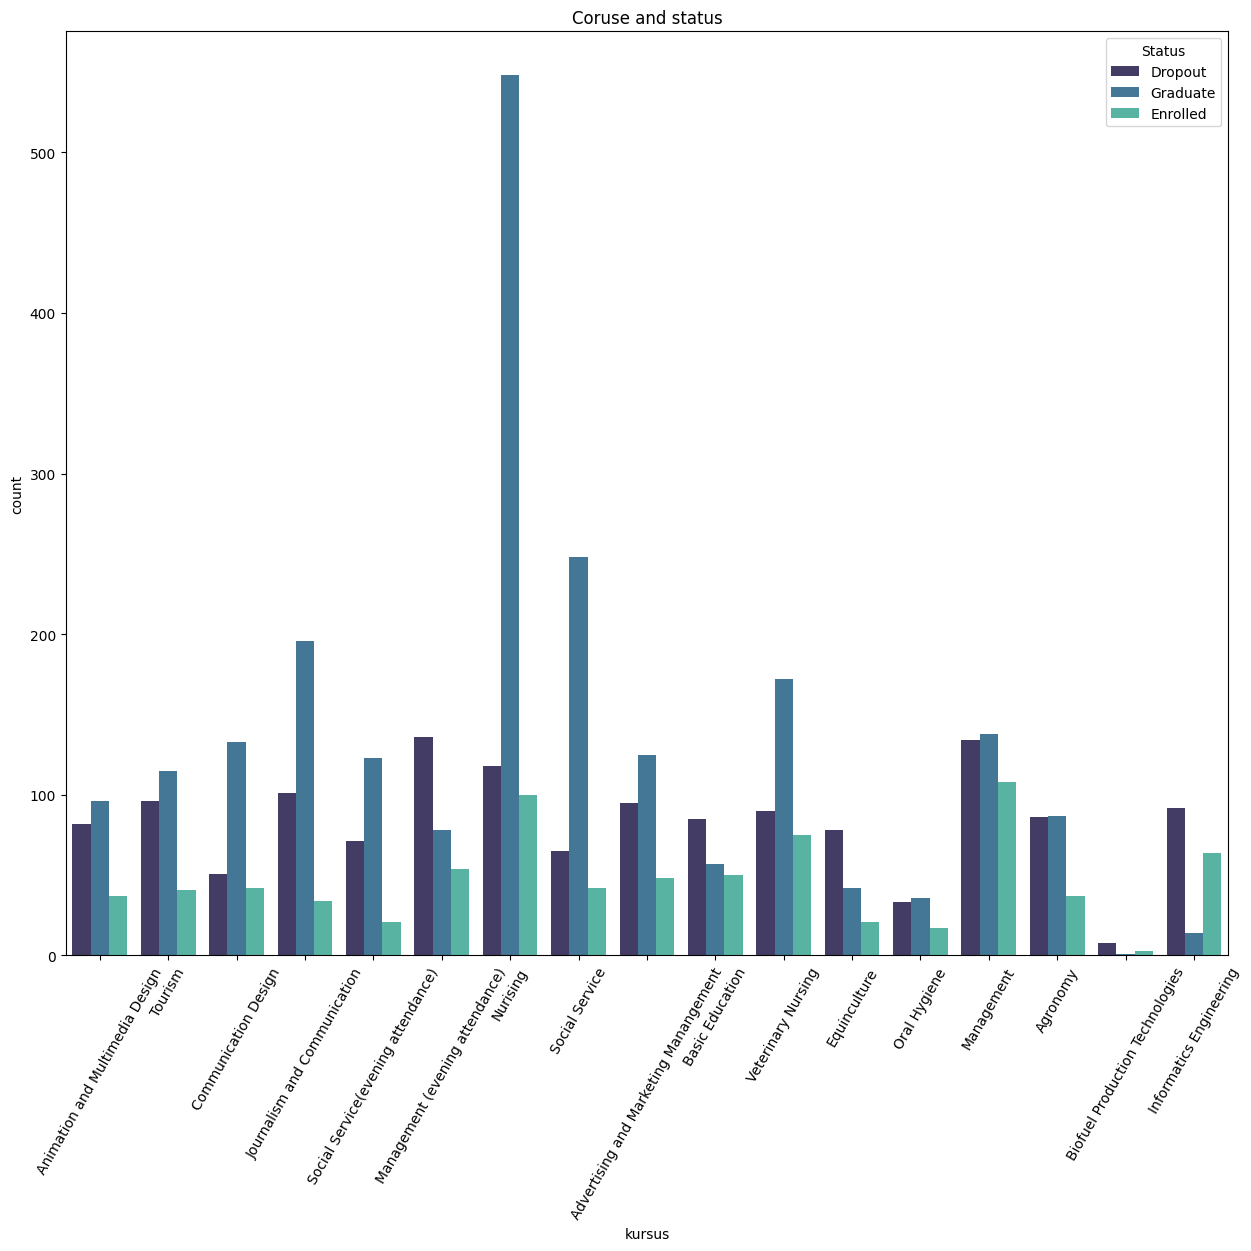

In [71]:

plt.figure(figsize=(15,12))
sns.countplot(df,x='kursus',hue='Status',palette='mako' )
plt.title('Coruse and status')
plt.xticks(rotation = 60)
plt.show()


In [72]:
df['malam_siang']=df['Daytime_evening_attendance'].astype(str)

In [73]:
df['malam_siang'].replace({'0':'Evening',
                           '1':'Daytime'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\1043453969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['malam_siang'].replace({'0':'Evening',


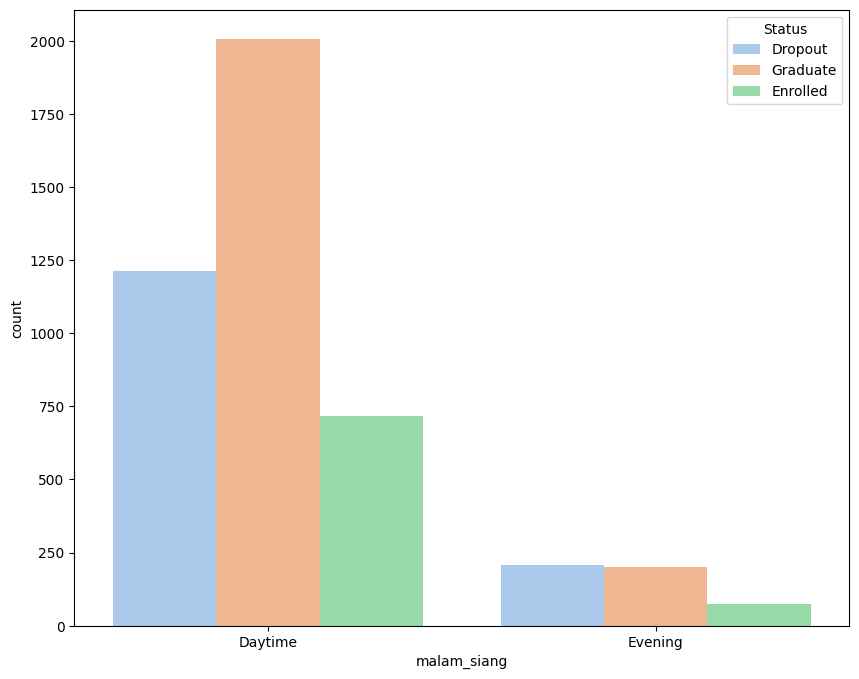

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(df,x='malam_siang',hue='Status',palette='pastel')
plt.show()

In [75]:
df['pernikahan'] = df['Marital_status'].astype(str)

In [76]:
df['pernikahan'].replace({'1':'Single',
                          '2':'Married',
                          '3':'Widower',
                          '4':'Divorced',
                          '5':'Facto Union',
                          '6':'Legally Separated'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\2225113732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pernikahan'].replace({'1':'Single',


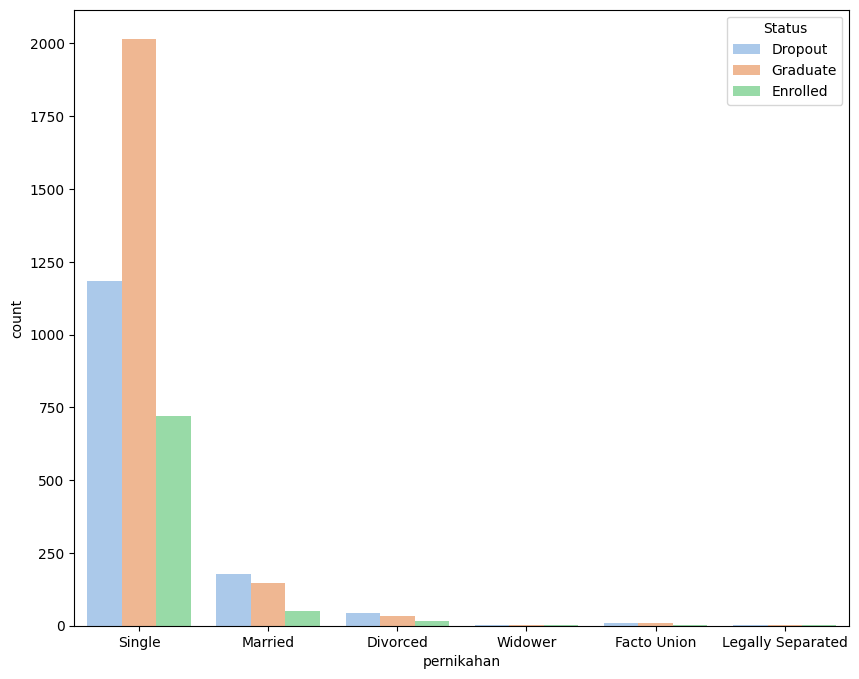

In [77]:
plt.figure(figsize=(10,8))
sns.countplot(df,x='pernikahan',palette='pastel',hue='Status')
plt.show()

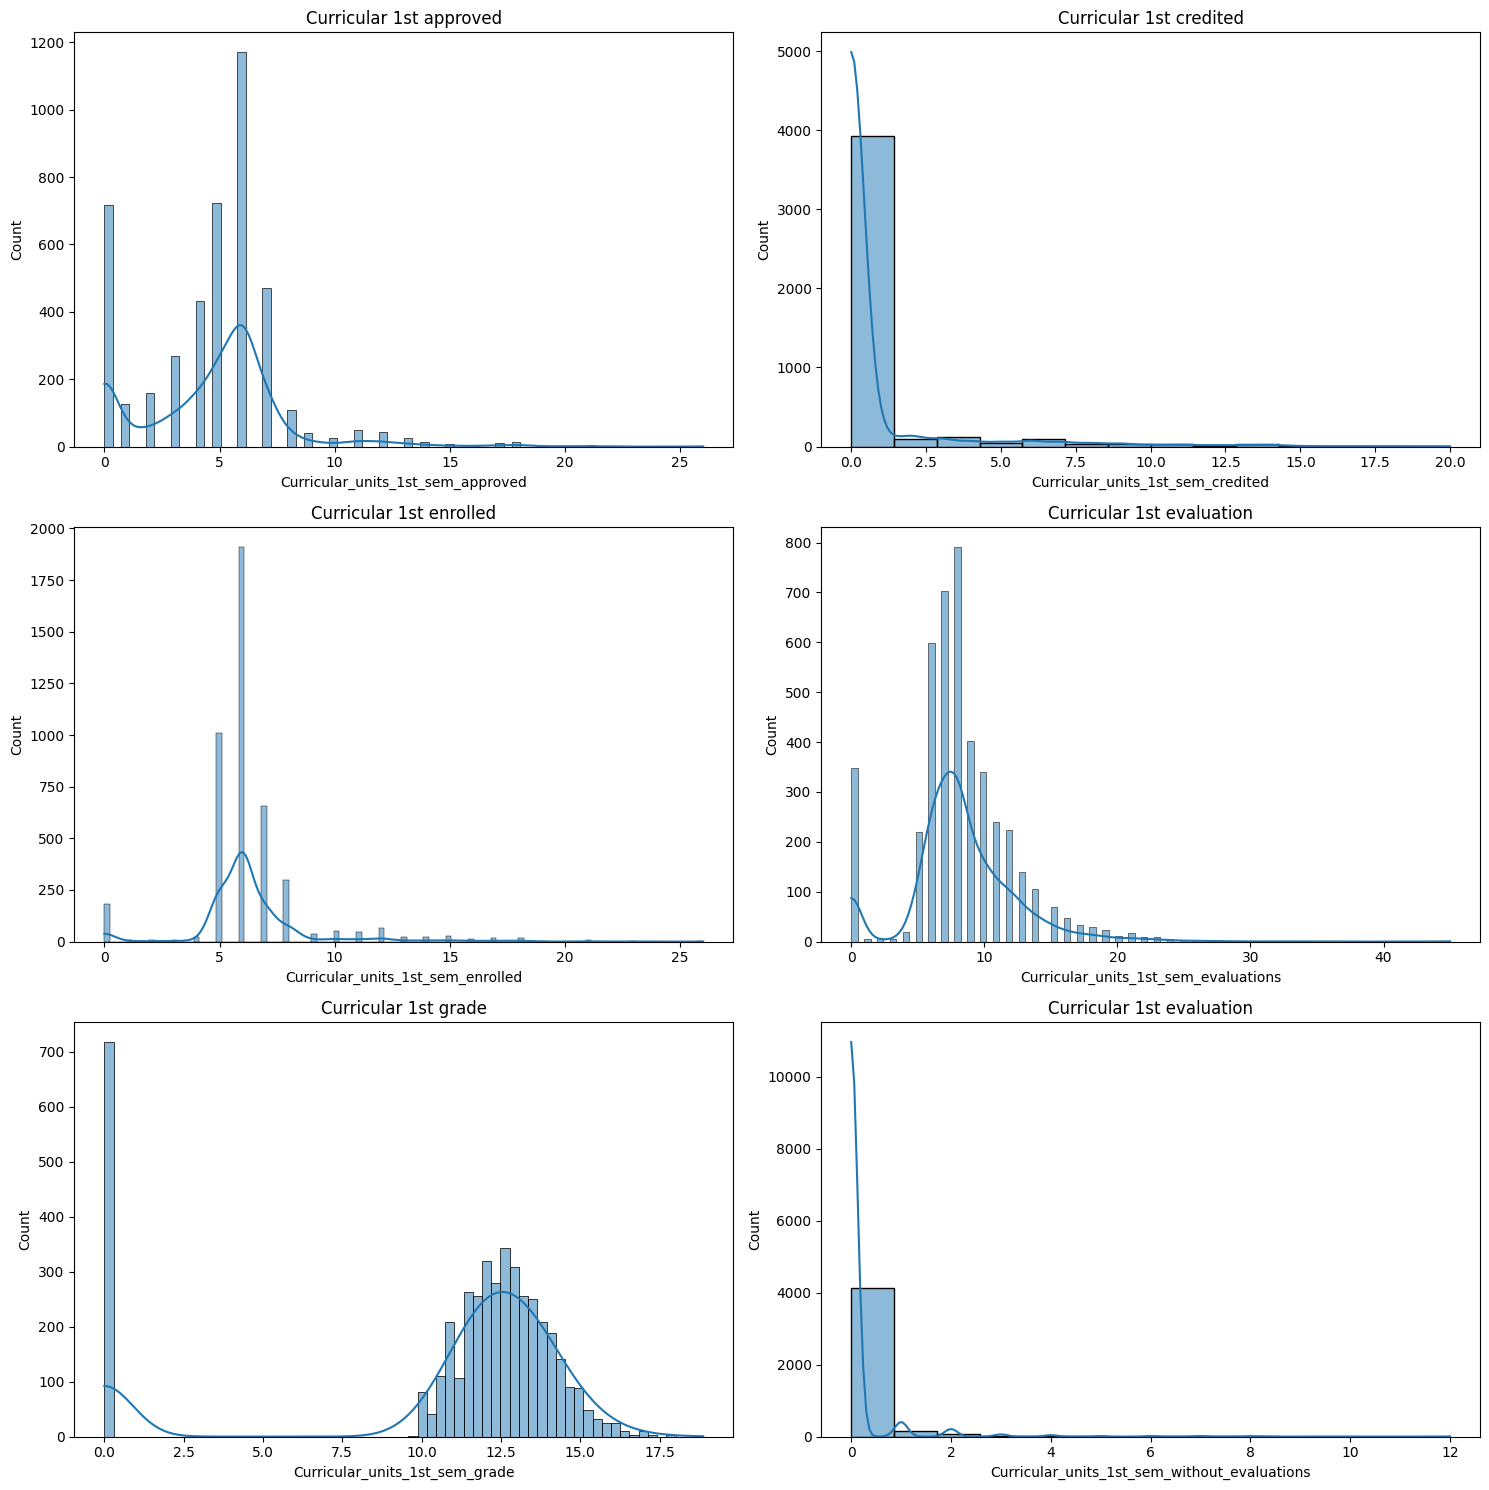

In [78]:
f, axes = plt.subplots(nrows=3,ncols=2,figsize = (15,15))
sns.histplot(df['Curricular_units_1st_sem_approved'],kde=True, ax=axes[0,0]).set_title('Curricular 1st approved')
sns.histplot(df['Curricular_units_1st_sem_credited'],kde=True,ax=axes[0,1]).set_title('Curricular 1st credited')
sns.histplot(df['Curricular_units_1st_sem_enrolled'],kde=True,ax=axes[1,0]).set_title('Curricular 1st enrolled')
sns.histplot(df['Curricular_units_1st_sem_evaluations'],kde=True,ax=axes[1,1]).set_title('Curricular 1st evaluation')
sns.histplot(df['Curricular_units_1st_sem_grade'],kde=True,ax=axes[2,0]).set_title('Curricular 1st grade')
sns.histplot(df['Curricular_units_1st_sem_without_evaluations'],kde=True,ax=axes[2,1]).set_title('Curricular 1st evaluation')

plt.tight_layout()
plt.show()


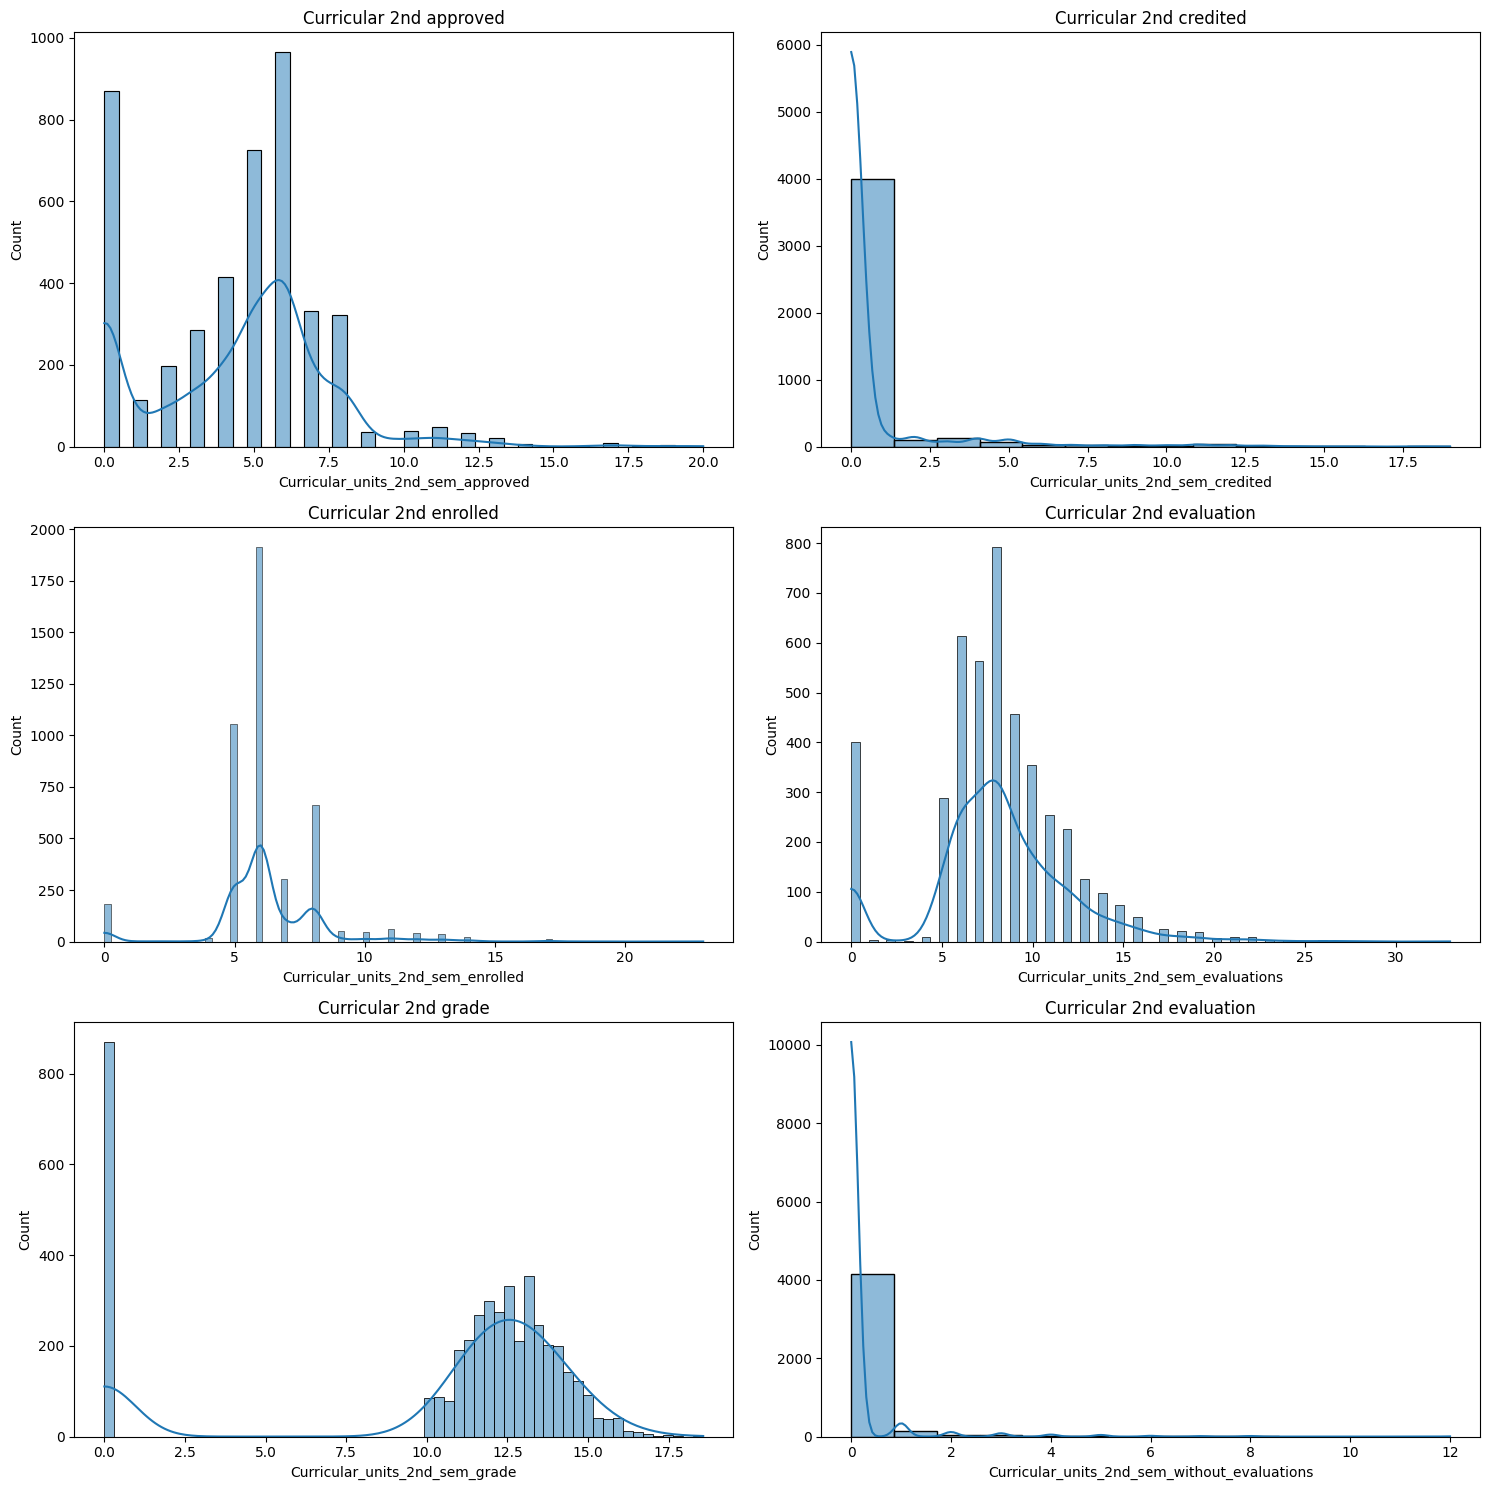

In [79]:
f, axes = plt.subplots(nrows=3,ncols=2,figsize = (15,15))
sns.histplot(df['Curricular_units_2nd_sem_approved'],kde=True, ax=axes[0,0]).set_title('Curricular 2nd approved')
sns.histplot(df['Curricular_units_2nd_sem_credited'],kde=True,ax=axes[0,1]).set_title('Curricular 2nd credited')
sns.histplot(df['Curricular_units_2nd_sem_enrolled'],kde=True,ax=axes[1,0]).set_title('Curricular 2nd enrolled')
sns.histplot(df['Curricular_units_2nd_sem_evaluations'],kde=True,ax=axes[1,1]).set_title('Curricular 2nd evaluation')
sns.histplot(df['Curricular_units_2nd_sem_grade'],kde=True,ax=axes[2,0]).set_title('Curricular 2nd grade')
sns.histplot(df['Curricular_units_2nd_sem_without_evaluations'],kde=True,ax=axes[2,1]).set_title('Curricular 2nd evaluation')

plt.tight_layout()
plt.show()

In [80]:
df['gender']=df['Gender'].astype(str)

In [81]:
df['gender'].replace({'1':'male',
                      '0':'female'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\2401468942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'1':'male',


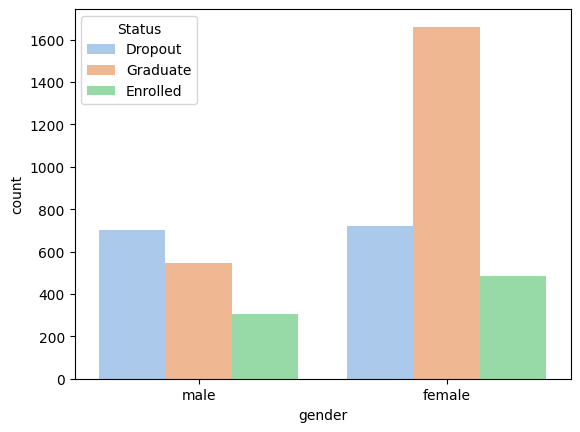

In [82]:
sns.countplot(df,x='gender',hue='Status',palette='pastel')
plt.show()

In [83]:
df['displaced'] = df['Displaced'].astype(str)
df['displaced'].replace({'1':'yes',
                         '0':'no'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\3662815427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['displaced'].replace({'1':'yes',


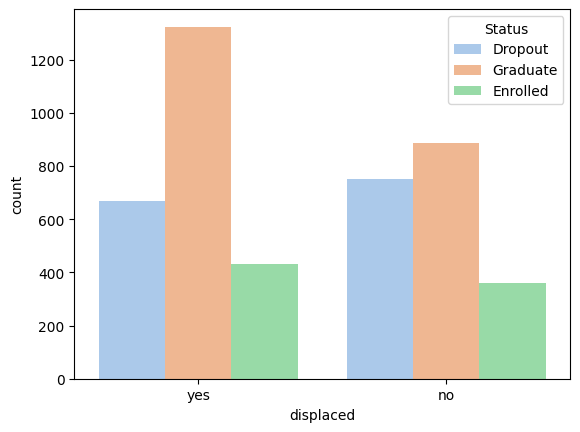

In [84]:
sns.countplot(df,x='displaced',hue='Status',palette='pastel')
plt.show()

In [85]:
df['educational_special_needs'] = df['Educational_special_needs'].astype(str)
df['educational_special_needs'].replace({'1':'yes',
                         '0':'no'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\3606818188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['educational_special_needs'].replace({'1':'yes',


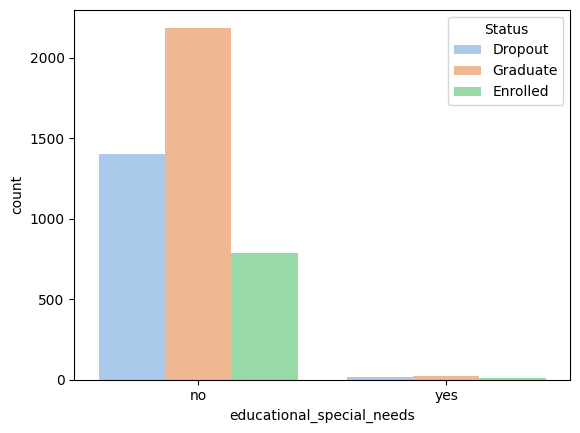

In [86]:
sns.countplot(df,x='educational_special_needs',hue='Status',palette='pastel')
plt.show()

In [87]:
df['debtor'] = df['Debtor'].astype(str)
df['debtor'].replace({'1':'yes',
                         '0':'no'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\1604130480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['debtor'].replace({'1':'yes',


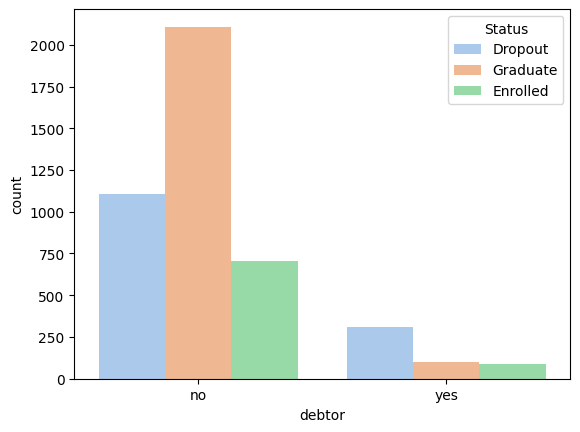

In [88]:
sns.countplot(df,x='debtor',hue='Status',palette='pastel')
plt.show()

In [89]:
df['Tuition'] = df['Tuition_fees_up_to_date'].astype(str)
df['Tuition'].replace({'1':'yes',
                         '0':'no'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\3602399369.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tuition'].replace({'1':'yes',


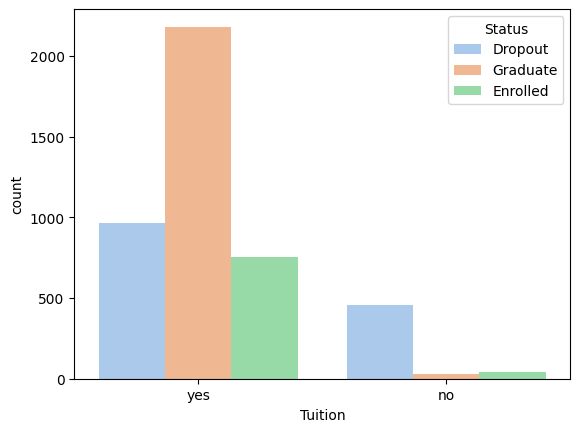

In [90]:
sns.countplot(df,x='Tuition',hue='Status',palette='pastel')
plt.show()

In [91]:
df['scholarship'] = df['Scholarship_holder'].astype(str)
df['scholarship'].replace({'1':'yes',
                         '0':'no'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\1551912012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['scholarship'].replace({'1':'yes',


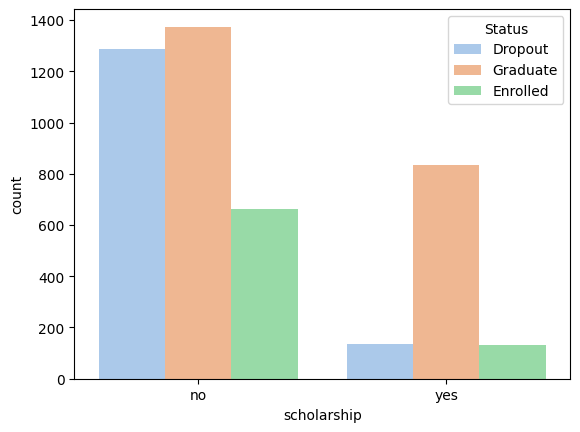

In [92]:
sns.countplot(df,x='scholarship',hue='Status',palette='pastel')
plt.show()

In [93]:
df['international'] = df['International'].astype(str)
df['international'].replace({'1':'yes',
                         '0':'no'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\524791554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['international'].replace({'1':'yes',


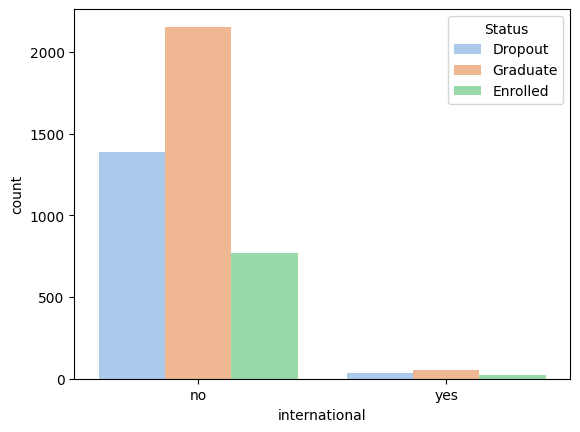

In [94]:
sns.countplot(df,x='international',hue='Status',palette='pastel')
plt.show()

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\855466206.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age_at_enrollment'],kde=True,palette='pastel')


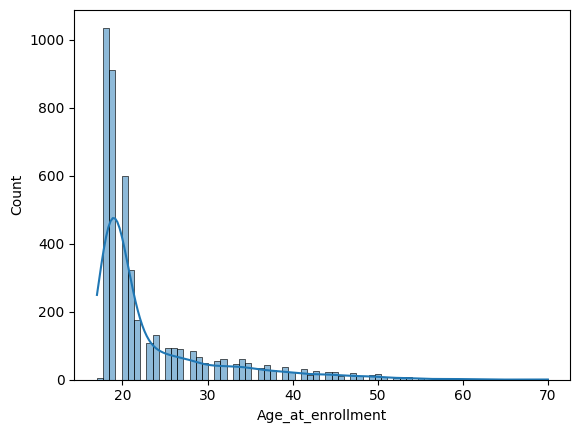

In [95]:
sns.histplot(df['Age_at_enrollment'],kde=True,palette='pastel')
plt.show()

In [96]:
df['nacionality'] = df['Nacionality'].astype(str)
df['nacionality'].replace({'1':'Portuguese',
                         '2':'German',
                         '6':'Spanish',
                         '11':'Italian',
                         '13':'Dutch',
                         '14':'English',
                         '17':'Lithuanian',
                         '21':'Angolan',
                         '22':'Cape Verdean',
                         '24':'Guinean',
                         '25':'Mozambican',
                         '26':'Santomean',
                         '32':'Turkish',
                         '41':'Brazilian',
                         '62':'Romanian',
                         '100': 'Moldova (Republic of)',
                         '101':'Mexican',
                         '103':'Ukrainian',
                         '105': 'Russian',
                         '108':'Cuban',
                         '109':'Colombian'},inplace=True)

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\356311626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nacionality'].replace({'1':'Portuguese',


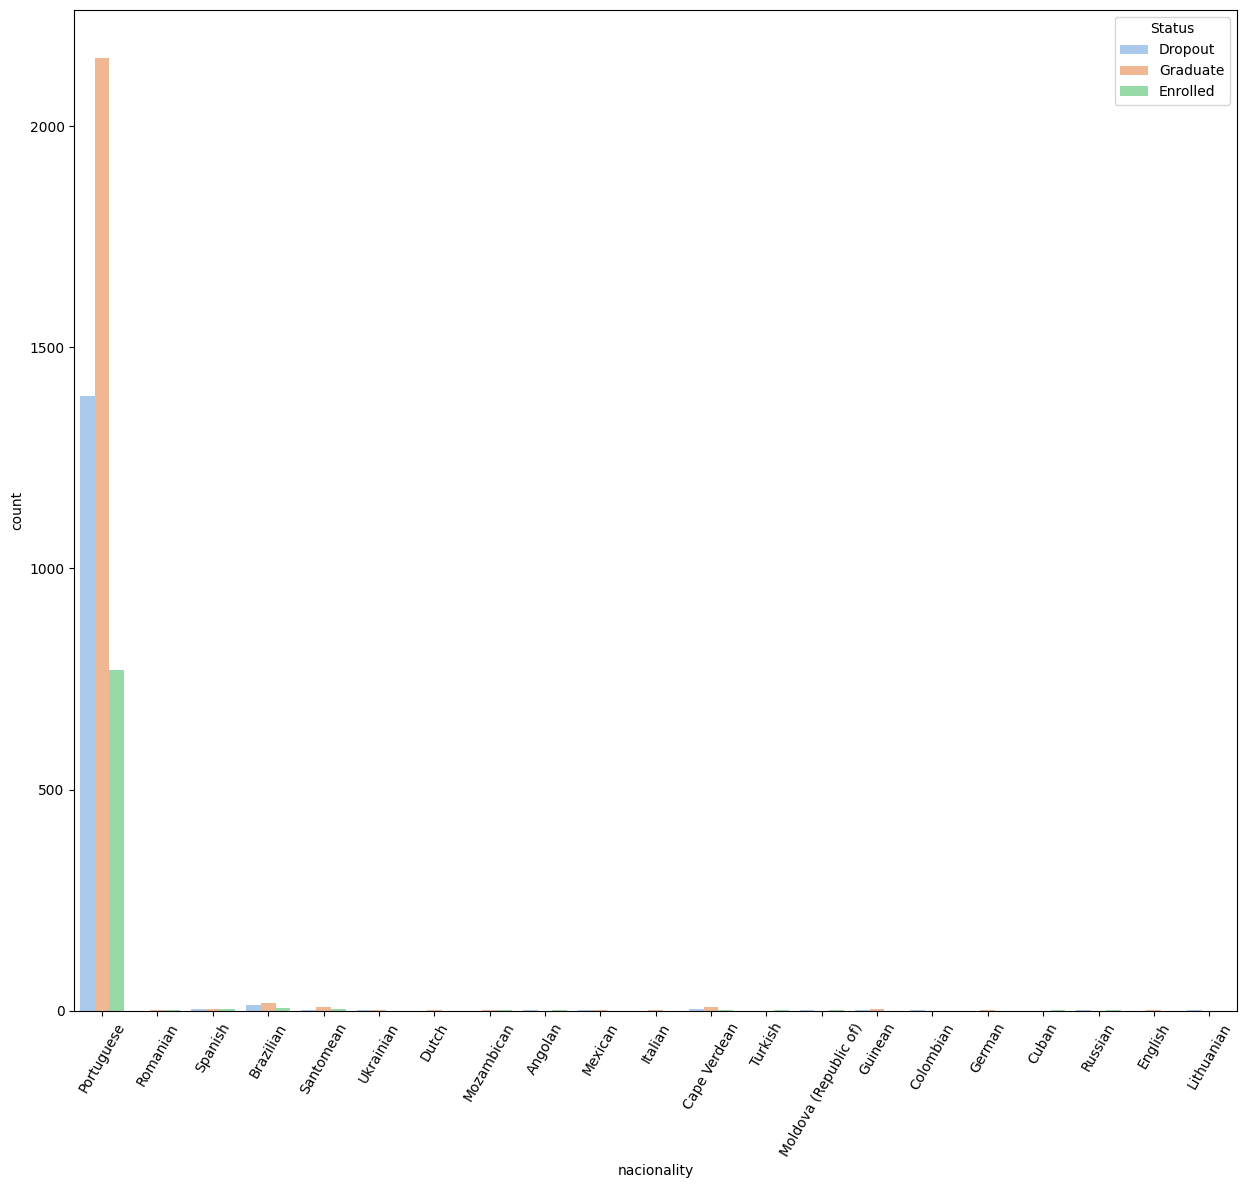

In [97]:
plt.figure(figsize=(15,13))
sns.countplot(x='nacionality',data=df,hue='Status',palette='pastel')
plt.xticks(rotation = 60)
plt.show()

In [98]:
df_clean= df
df_clean.drop(columns=['Course','Gender', 'Daytime_evening_attendance','Marital_status','Displaced','Educational_special_needs','Debtor','Tuition_fees_up_to_date','Scholarship_holder','International','Nacionality','Mothers_qualification','Mothers_occupation','Fathers_qualification','Fathers_occupation','Application_mode','Previous_qualification'], inplace=True)

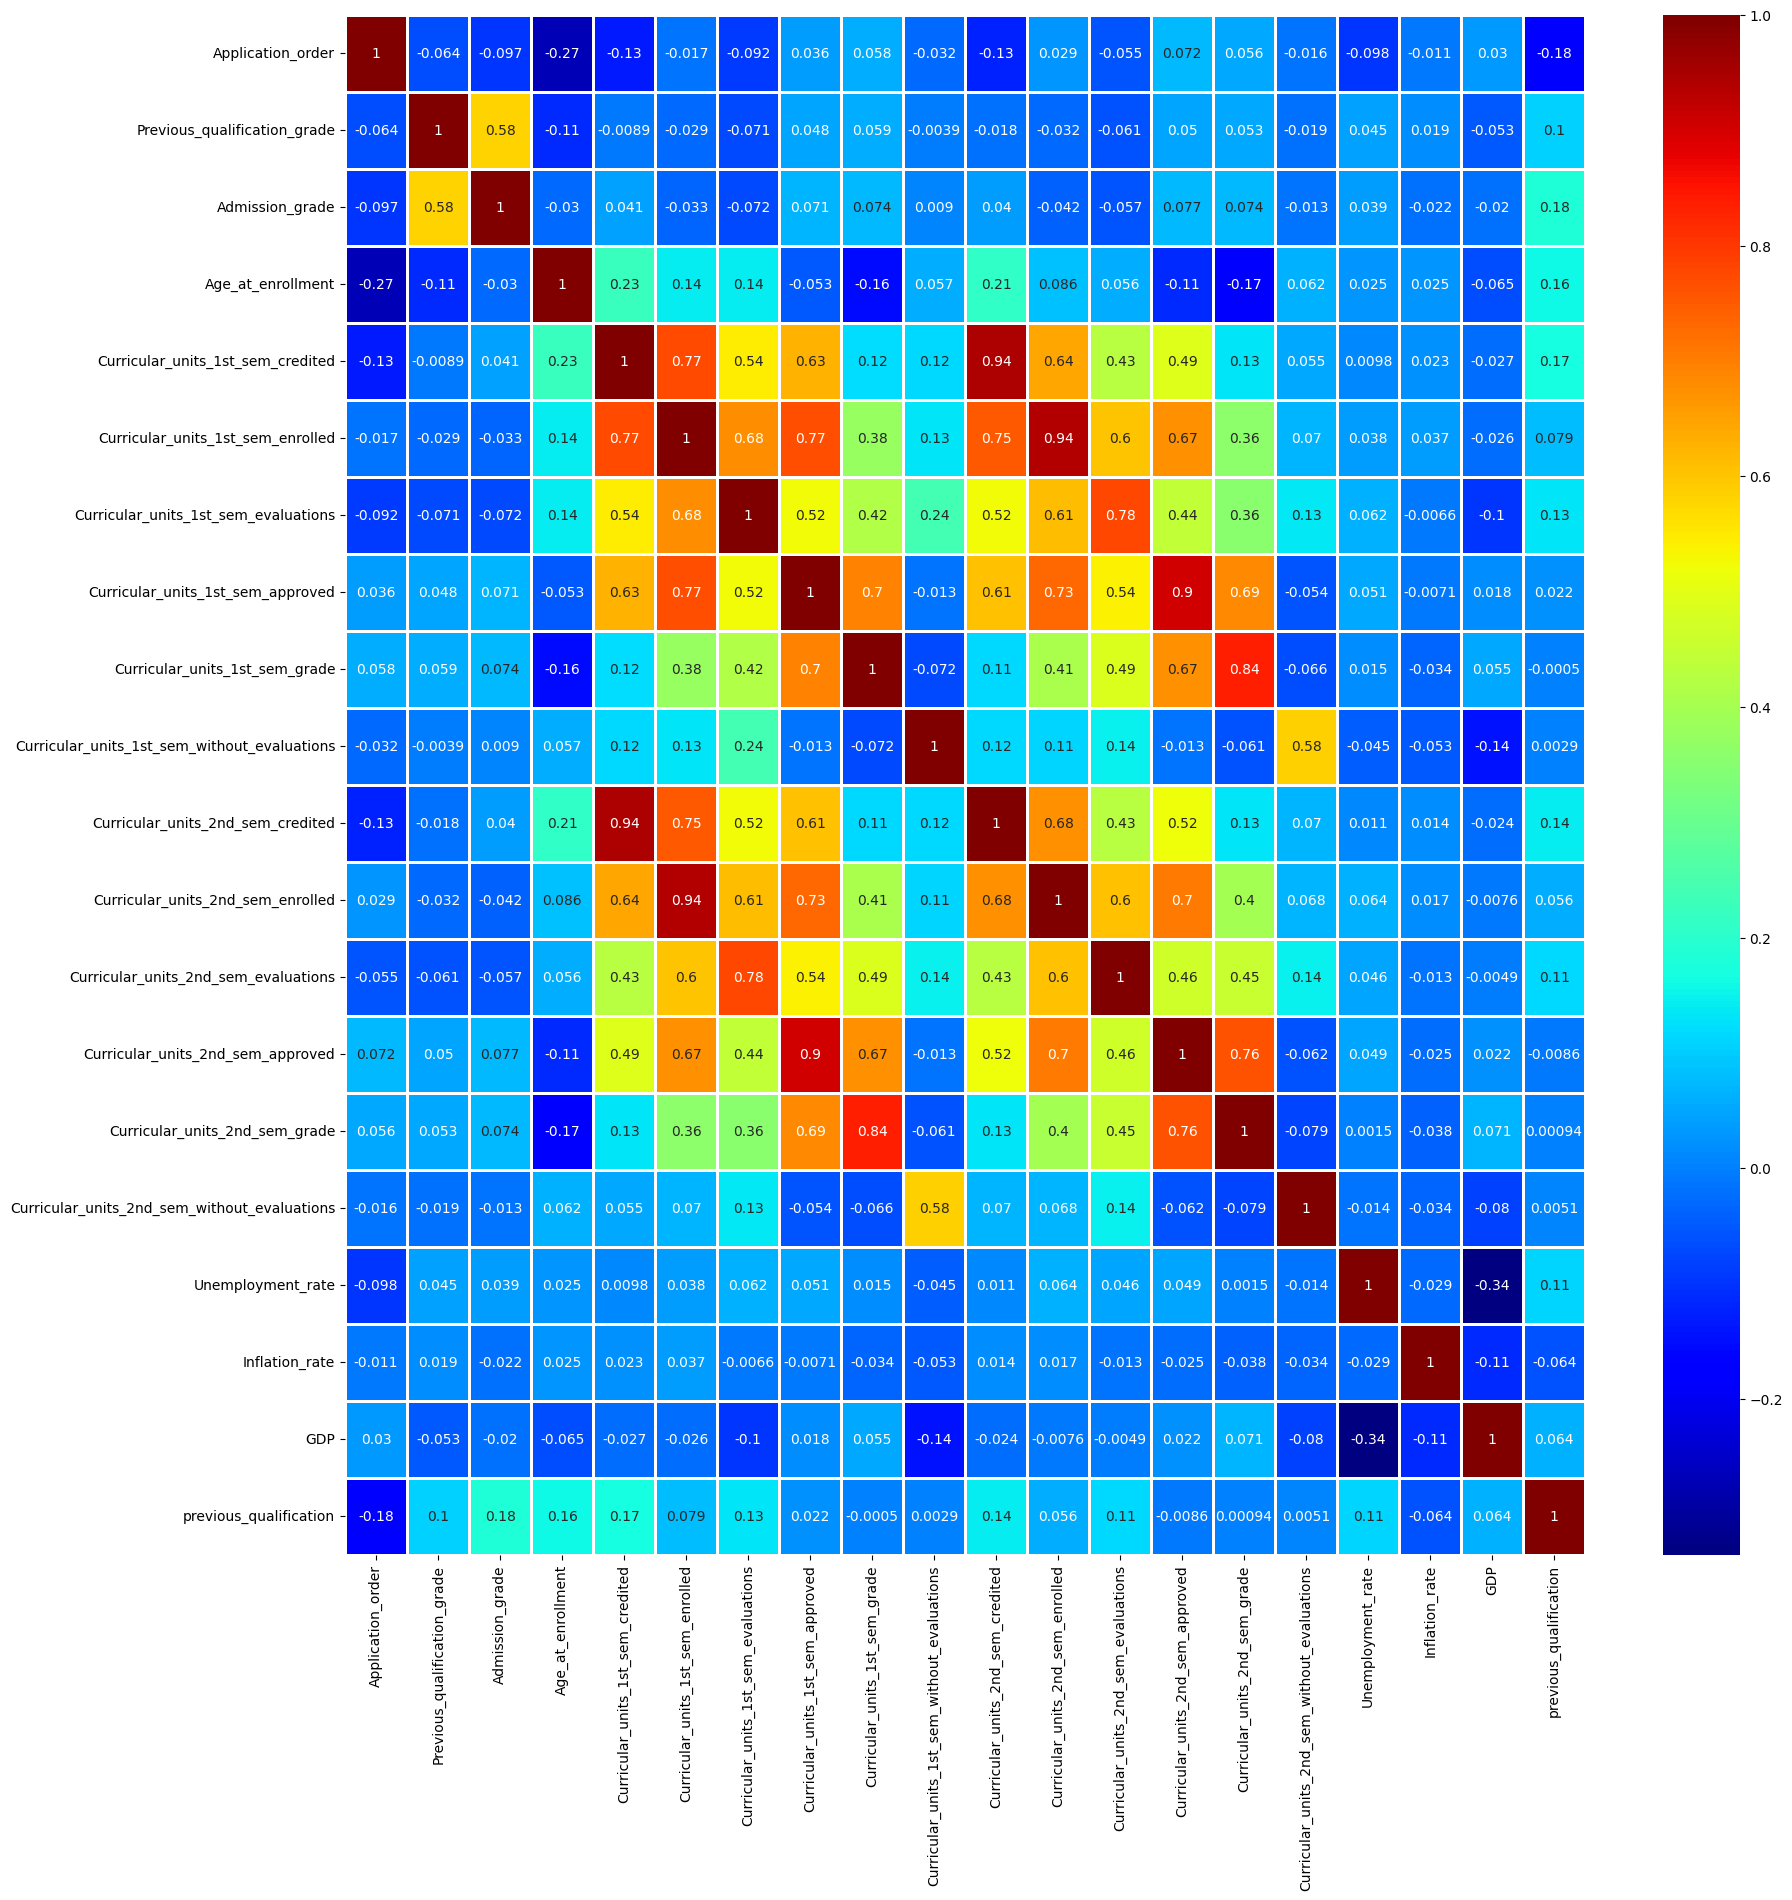

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='jet',linewidth=1)
plt.show()

## Data Preparation / Preprocessing

In [100]:
new_df_clean = df_clean.drop(columns=['Inflation_rate','GDP','Application_order','mothers_qualification','fathers_qualification',
                                      'mothers_occupation','fathers_occupation','Unemployment_rate','Curricular_units_2nd_sem_without_evaluations',
                                      'Curricular_units_2nd_sem_enrolled','Curricular_units_2nd_sem_credited',
                                      'Curricular_units_1st_sem_without_evaluations','Curricular_units_1st_sem_enrolled',
                                      'Curricular_units_1st_sem_credited','Admission_grade','Previous_qualification_grade','application_mode',
                                      'previous_qualification','nacionality','international','gender'])

In [101]:
new_df_clean.to_csv('C:/Aplikasi/Dicoding/Proyek akhir/Submission/data_clean.csv')

In [102]:
new_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age_at_enrollment                     4424 non-null   int64  
 1   Curricular_units_1st_sem_evaluations  4424 non-null   int64  
 2   Curricular_units_1st_sem_approved     4424 non-null   int64  
 3   Curricular_units_1st_sem_grade        4424 non-null   float64
 4   Curricular_units_2nd_sem_evaluations  4424 non-null   int64  
 5   Curricular_units_2nd_sem_approved     4424 non-null   int64  
 6   Curricular_units_2nd_sem_grade        4424 non-null   float64
 7   Status                                4424 non-null   object 
 8   kursus                                4424 non-null   object 
 9   malam_siang                           4424 non-null   object 
 10  pernikahan                            4424 non-null   object 
 11  displaced        

Feature Scaling

In [103]:
scaling = MinMaxScaler()
numeric = ['Age_at_enrollment',
              'Curricular_units_1st_sem_approved',
              'Curricular_units_1st_sem_evaluations',
              'Curricular_units_1st_sem_grade',
              'Curricular_units_2nd_sem_approved',
              'Curricular_units_2nd_sem_evaluations',
              'Curricular_units_2nd_sem_grade']
df_scaling = new_df_clean
df_scaling[numeric] = scaling.fit_transform(df_scaling[numeric])
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age_at_enrollment                     4424 non-null   float64
 1   Curricular_units_1st_sem_evaluations  4424 non-null   float64
 2   Curricular_units_1st_sem_approved     4424 non-null   float64
 3   Curricular_units_1st_sem_grade        4424 non-null   float64
 4   Curricular_units_2nd_sem_evaluations  4424 non-null   float64
 5   Curricular_units_2nd_sem_approved     4424 non-null   float64
 6   Curricular_units_2nd_sem_grade        4424 non-null   float64
 7   Status                                4424 non-null   object 
 8   kursus                                4424 non-null   object 
 9   malam_siang                           4424 non-null   object 
 10  pernikahan                            4424 non-null   object 
 11  displaced        

Label Encoding

In [104]:
categorical_feature = ['Status','kursus','malam_siang','pernikahan','displaced','educational_special_needs',
                                 'debtor','Tuition','scholarship']

In [105]:
df_scaling[categorical_feature]= df_scaling[categorical_feature].apply(LabelEncoder().fit_transform)

In [106]:
joblib.dump(df_scaling[categorical_feature],'trans_jlib')

['trans_jlib']

In [107]:
df_scaling

,Age_at_enrollment,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status,kursus,malam_siang,pernikahan,displaced,educational_special_needs,debtor,Tuition,scholarship
0,0.056604,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,2,0,4,1,0,0,1,0
1,0.037736,0.133333,0.230769,0.741722,0.181818,0.30,0.735897,2,15,0,4,1,0,0,0,0
2,0.037736,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,5,0,4,1,0,0,0,0
3,0.056604,0.177778,0.230769,0.711447,0.303030,0.25,0.667692,2,8,0,4,1,0,0,1,0
4,0.528302,0.200000,0.192308,0.653422,0.181818,0.30,0.700000,2,14,1,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.037736,0.155556,0.192308,0.720530,0.242424,0.25,0.682051,2,8,0,4,0,0,0,1,0
4420,0.018868,0.133333,0.230769,0.635762,0.181818,0.10,0.592308,0,8,0,4,1,0,1,0,0
4421,0.245283,0.177778,0.269231,0.790066,0.272727,0.05,0.726923,0,11,0,4,1,0,0,1,1
4422,0.056604,0.111111,0.192308,0.731126,0.181818,0.25,0.646154,2,9,0,4,1,0,0,1,1


In [109]:
categorical_feature = ['Status','kursus','malam_siang','pernikahan','displaced','educational_special_needs',
                                 'debtor','Tuition','scholarship']

In [110]:
x = df_scaling.drop(['Status'],axis=1)
y = df_scaling['Status']

In [111]:
print(x.shape)
print(y.shape)

(4424, 15)
(4424,)


Balancing

In [112]:
smote = SMOTE(random_state=30)
x_balance,y_balance = smote.fit_resample(x,y)

In [113]:
print(x_balance.shape)
print(y_balance.shape)

(6627, 15)
(6627,)


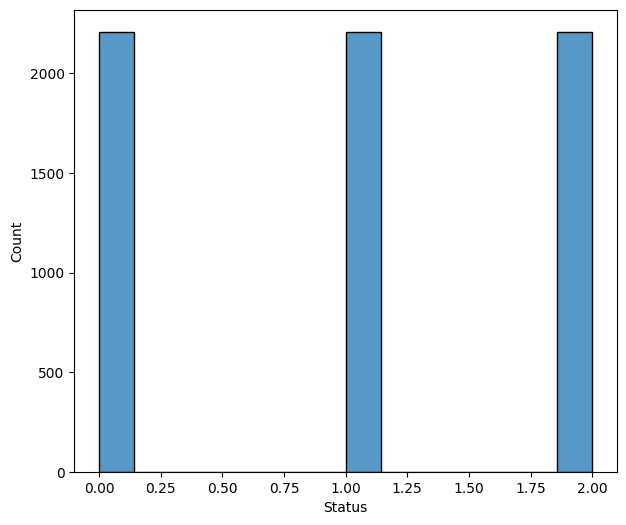

In [114]:
fig = plt.subplots(figsize = (7,6))
sns.histplot(data=y_balance)
plt.show()

## Modeling

Splitting Data

In [115]:
X_train,X_test,y_train,y_test = train_test_split(x_balance,y_balance,test_size=0.2,random_state=42)

Model Logistic Regression

In [116]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [117]:
y_predik_logistic = logistic_model.predict(X_test)
joblib.dump(y_predik_logistic, 'logistic_jlib')

['logistic_jlib']

Random Forest

In [118]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [119]:
y_predik_rf = rf_model.predict(X_test)
joblib.dump(y_predik_rf, 'rfc_jlib')

['rfc_jlib']

Decission Tree

In [120]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [121]:
y_predik_tree = tree_model.predict(X_test)
joblib.dump(y_predik_tree, 'Dtree_jlib')

['Dtree_jlib']

Model XGboost Classifier

In [122]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [123]:
y_pred_xgb = xgb_model.predict(X_test)
joblib.dump(y_pred_xgb, 'xgb_jlib')
joblib.dump(xgb_model,'xgb.pkl')

['xgb.pkl']

Model Adaboost Classifier

In [124]:
abc_model = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [125]:
y_pred_abc = abc_model.predict(X_test)
joblib.dump(y_pred_abc, 'abc_jlib')

['abc_jlib']

## Evaluation

Metric Logistic Regression

In [126]:
logistic_accuracy = accuracy_score(y_test,y_predik_logistic)
logistic_precision = precision_score(y_test,y_predik_logistic,average='micro')
logistic_recall = recall_score(y_test,y_predik_logistic,average='micro')
logistic_f1 = f1_score(y_test,y_predik_logistic,average='micro')

Metric Random Forest

In [127]:
rf_accuracy = accuracy_score(y_test,y_predik_rf)
rf_precision = precision_score(y_test,y_predik_rf,average='micro')
rf_recall = recall_score(y_test,y_predik_rf,average='micro')
rf_f1 = f1_score(y_test,y_predik_rf,average='micro')

Metric Decission Tree

In [128]:
tree_accuracy = accuracy_score(y_test,y_predik_tree)
tree_precision = precision_score(y_test,y_predik_tree,average='micro')
tree_recall = recall_score(y_test,y_predik_tree,average='micro')
tree_f1 = f1_score(y_test,y_predik_tree,average='micro')

Metric XGboost Classifier

In [129]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb,average='micro')
xgb_recall = recall_score(y_test, y_pred_xgb,average='micro')
xgb_f1 = f1_score(y_test, y_pred_xgb,average='micro')

Metric AdaBoost Classifier

In [130]:
abc_accuracy = accuracy_score(y_test, y_pred_abc)
abc_precision = precision_score(y_test, y_pred_abc,average='micro')
abc_recall = recall_score(y_test, y_pred_abc,average='micro')
abc_f1 = f1_score(y_test, y_pred_abc,average='micro')

In [131]:
Perbandingan_model = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest', 'DecisonTreeClassifier','XGboost','AdaBoost'],
    'Accuracy' : [logistic_accuracy, rf_accuracy, tree_accuracy, xgb_accuracy, abc_accuracy],
    'Precision' : [logistic_precision, rf_precision, tree_precision, xgb_precision, abc_precision],
    'Recall' : [logistic_recall, rf_recall, tree_recall, xgb_recall, abc_recall],
    'F1-Score' : [logistic_f1, rf_f1, tree_f1, xgb_f1, abc_f1]
})

In [132]:
Perbandingan_model

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.695324,0.695324,0.695324,0.695324
1,Random Forest,0.791855,0.791855,0.791855,0.791855
2,DecisonTreeClassifier,0.748115,0.748115,0.748115,0.748115
3,XGboost,0.800905,0.800905,0.800905,0.800905
4,AdaBoost,0.708145,0.708145,0.708145,0.708145


In [133]:
joblib.dump(Perbandingan_model, 'perbandingan_model_jlib')

['perbandingan_model_jlib']

In [134]:
# Detailed Classification Reports
print("\nClassification Report: Logistic Regression")
print(classification_report(y_test, y_predik_logistic))

print("\nClassification Report: Random Forest")
print(classification_report(y_test, y_predik_rf))

print("\nClassification Report: DecisionTree")
print(classification_report(y_test, y_predik_tree))

print("\nClassification Report: XGboost")
print(classification_report(y_test, y_pred_xgb))

print("\nClassification Report: AdaBoost")
print(classification_report(y_test, y_pred_abc))


Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       444
           1       0.61      0.61      0.61       439
           2       0.70      0.78      0.73       443

    accuracy                           0.70      1326
   macro avg       0.70      0.70      0.70      1326
weighted avg       0.70      0.70      0.70      1326


Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.73      0.79       444
           1       0.71      0.80      0.76       439
           2       0.81      0.85      0.83       443

    accuracy                           0.79      1326
   macro avg       0.80      0.79      0.79      1326
weighted avg       0.80      0.79      0.79      1326


Classification Report: DecisionTree
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       444
          

Confusion Matrix

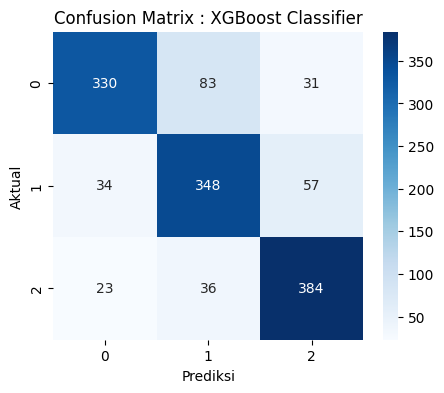

In [135]:
xgb_confusion_matrix = sklearn_confusion_matrix(y_test,y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(xgb_confusion_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix : XGBoost Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


In [136]:
joblib.dump(xgb_confusion_matrix, 'confusion_jlib')

['confusion_jlib']

In [137]:
xgb_model.feature_importances_

array([0.04034223, 0.05897548, 0.05787615, 0.02889368, 0.0457343 ,
       0.2830149 , 0.03333189, 0.04907171, 0.02689292, 0.0240174 ,
       0.028779  , 0.01387527, 0.04141672, 0.2095022 , 0.05827608],
      dtype=float32)

In [138]:
df_penting = pd.DataFrame({
    'Feature': x_balance.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [139]:
joblib.dump(df_penting, 'Penting_jlib')

['Penting_jlib']

C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_7028\1909427014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_penting, palette="viridis")


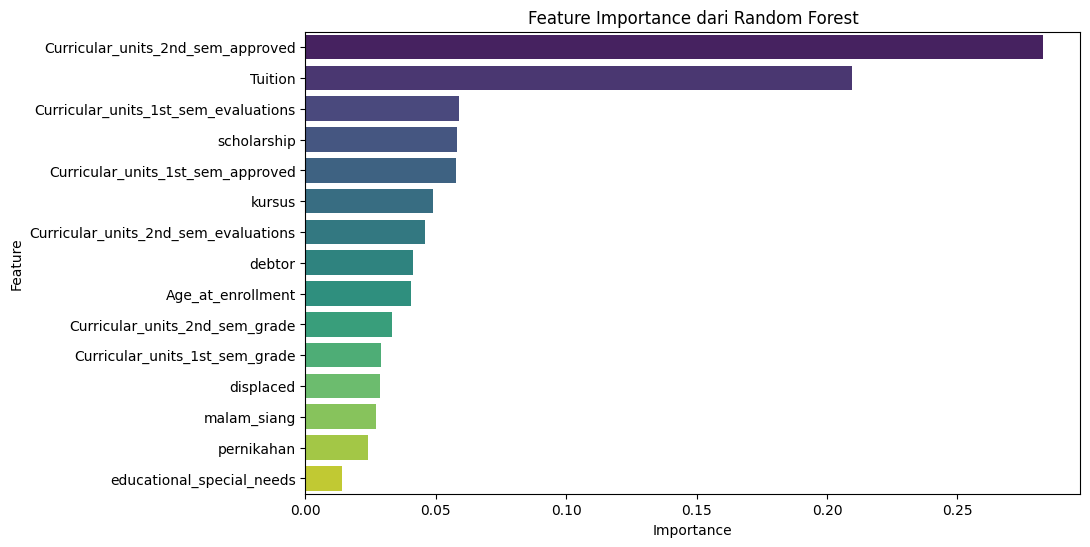

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_penting, palette="viridis")
plt.title("Feature Importance dari Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [141]:
df_penting

,Feature,Importance
5,Curricular_units_2nd_sem_approved,0.283015
13,Tuition,0.209502
1,Curricular_units_1st_sem_evaluations,0.058975
14,scholarship,0.058276
2,Curricular_units_1st_sem_approved,0.057876
7,kursus,0.049072
4,Curricular_units_2nd_sem_evaluations,0.045734
12,debtor,0.041417
0,Age_at_enrollment,0.040342
6,Curricular_units_2nd_sem_grade,0.033332
